<a href="https://colab.research.google.com/github/GiriSrinivasan/Aviation-Accident-Analysis-CaseStudy-5/blob/main/Aviation_Accident_Analysis_CaseStudy_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

In [ ]:
# Importing dataset
data = pd.read_csv("C:/Data Science/Case Studies/Aviation accident project/Dataset1.csv")

In [ ]:
data.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [ ]:
data.shape

(5268, 13)

In [ ]:
# Checking for missing values
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
data["Time"] = data["Time"].replace(np.nan,"00:00")

In [ ]:
data.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
data["Time"].value_counts()

00:00    2223
15:00      32
12:00      31
11:00      29
16:00      26
         ... 
22:51       1
12:49       1
12:42       1
22:55       1
02:11       1
Name: Time, Length: 1005, dtype: int64

In [ ]:
data['Time'] = data['Time'].str.replace('c: ','')
data['Time'] = data['Time'].str.replace('c:','')
data['Time'] = data['Time'].str.replace('c','')
data['Time'] = data['Time'].str.replace('12\'20','12:20')
data['Time'] = data['Time'].str.replace('18.40','18:40')
data['Time'] = data['Time'].str.replace('0943','09:43')
data['Time'] = data['Time'].str.replace('22\'08','22:08')
data['Time'] = data['Time'].str.replace('114:20','00:00')

In [ ]:
data['Time'] = data['Date'] + ' ' +data['Time']

def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')

data['Time'] = data['Time'].apply(todate)

In [ ]:
print ("Data ranges from " + str(data.Time.min()) + " to " + str(data.Time.max()))

Data ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [ ]:
data.Operator = data.Operator.str.upper()
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# Exploratory Data Analysis 

# Total Accidents by Year

In [ ]:
temp = data.groupby(data.Time.dt.year)[["Date"]].count()
temp.head()

,Date
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


In [ ]:
temp =temp.rename(columns = {"Date":"Count"})

In [ ]:
temp

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5
...,...
2005,51
2006,49
2007,54


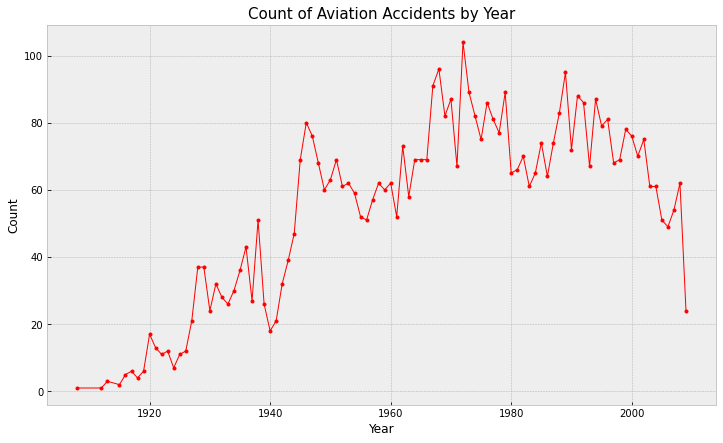

In [ ]:
plt.figure(figsize=(12,7))
plt.style.use("bmh")
plt.plot(temp.index, "Count", data=temp, color='red', marker='.', linewidth=1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Aviation Accidents by Year", fontsize=15)
plt.show()

In [ ]:
import matplotlib.pyplot as pl
import matplotlib.gridspec as gridspec

C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Giridharan.S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


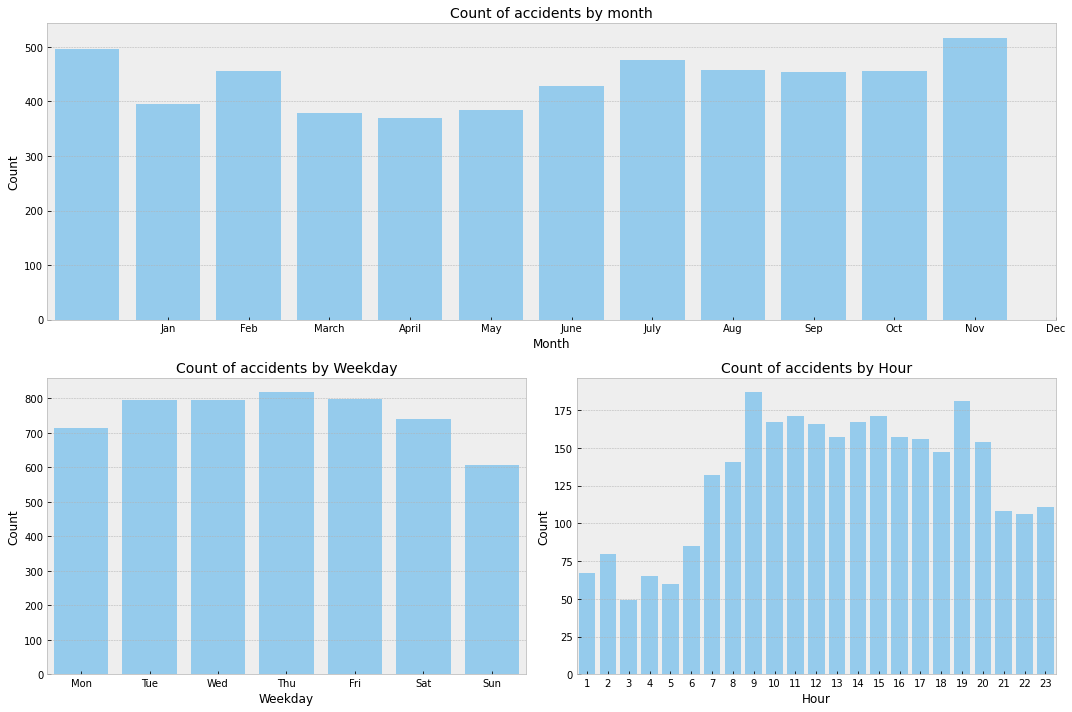

In [ ]:
gs = gridspec.GridSpec(2,2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')

# Plotiing month-wise
ax = pl.subplot(gs[0,:])
sns.barplot(data.groupby(data.Time.dt.month)[['Date']].count().index, 'Date',
            data = data.groupby(data.Time.dt.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(data.groupby(data.Time.dt.month)[['Date']].count().index, 
           ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by month', fontsize=14)

# Plotting Weekday-wise

ax = pl.subplot(gs[1,0])
sns.barplot(data.groupby(data.Time.dt.weekday)[['Date']].count().index, 'Date',
            data = data.groupby(data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(data.groupby(data.Time.dt.weekday)[['Date']].count().index, 
           ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by Weekday', fontsize=14)

# Plotting Hour-wise
          
ax = pl.subplot(gs[1,1])
sns.barplot(data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour )[['Date']].count().index, 'Date',
            data = data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by Hour', fontsize=14)
plt.tight_layout()
          
plt.show()         

# Passenger Vs Military Flight

In [ ]:
Temp = data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']
Temp

,isMilitary
Passenger,4469
Military,781


In [ ]:
Temp2 = data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:,['Time', 'Military', 'Passenger']]
Temp2

,Time,Military,Passenger
0,1908-09-17 17:18:00,True,False
1,1912-07-12 06:30:00,True,False
2,1913-08-06 00:00:00,False,True
3,1913-09-09 18:30:00,True,False
4,1913-10-17 10:30:00,True,False
...,...,...,...
5263,2009-05-20 06:30:00,True,False
5264,2009-05-26 00:00:00,False,True
5265,2009-06-01 00:15:00,False,True
5266,2009-06-07 08:30:00,False,True


In [ ]:
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)
Temp2

,Military,Passenger
Time,,
1908,1,0
1912,1,0
1913,2,1
1915,2,0
1916,5,0
...,...,...
2005,7,44
2006,12,37
2007,6,48


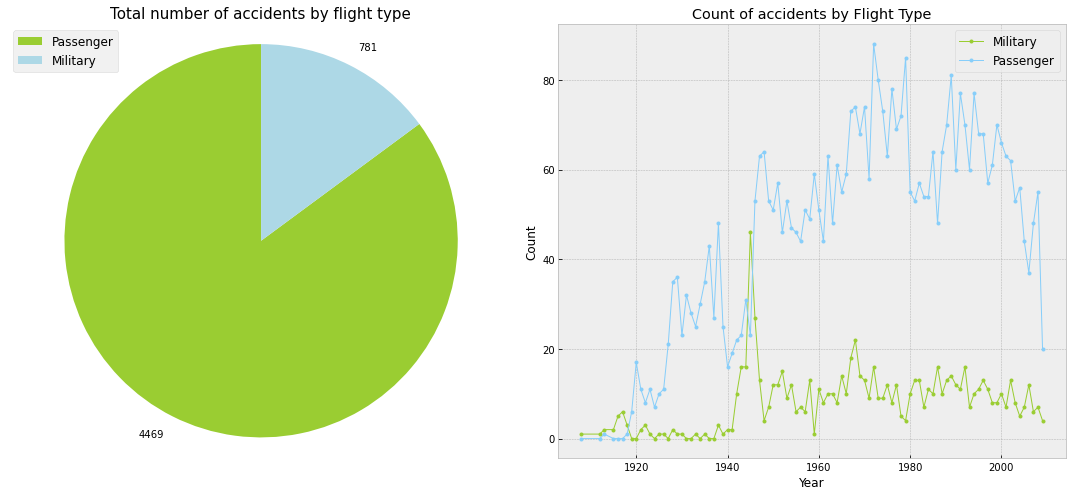

In [ ]:
# Plotting Military and Civil airplanes accident counts

colors = ['yellowgreen','lightblue']
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
patches, text = plt.pie(Temp.isMilitary,colors=colors,labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, fontsize=12)
plt.axis('equal')
plt.title("Total number of accidents by flight type", fontsize=15)

plt.subplot(1,2,2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='yellowgreen', marker= '.' , linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='lightskyblue', marker= '.' , linewidth=1)
plt.legend(fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Count of accidents by Flight Type")
plt.tight_layout()
plt.show()

# Total number of Fatalities

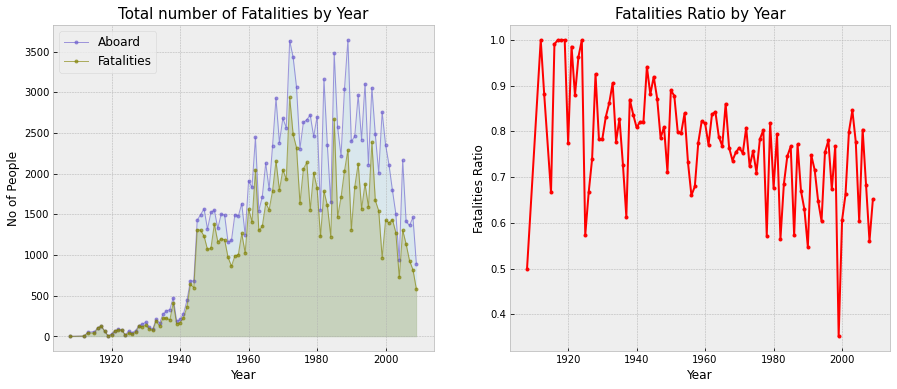

In [ ]:
fatalities = data.groupby(data.Time.dt.year).sum()
fatalities['Proportion'] = fatalities['Fatalities'] / fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.fill_between(fatalities.index, 'Aboard', data=fatalities, color='skyblue', alpha=0.2)
plt.plot(fatalities.index, 'Aboard', data=fatalities, marker='.',color='slateblue', alpha=0.6,linewidth=1)

plt.fill_between(fatalities.index, 'Fatalities', data=fatalities, color='olive', alpha=0.2)
plt.plot(fatalities.index, 'Fatalities', data=fatalities, marker='.',color='olive', alpha=0.6,linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('No of People',fontsize=12)
plt.title("Total number of Fatalities by Year",fontsize=15)

plt.subplot(1,2,2)
plt.plot(fatalities.index,'Proportion', data=fatalities, marker='.', color='red', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fatalities Ratio', fontsize=12)
plt.title('Fatalities Ratio by Year', fontsize=15)
plt.show()


# Importing dataset 2

In [ ]:
totals = pd.read_csv('C:/Data Science/Case Studies/Aviation accident project/Dataset2.csv')
totals.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN,NaN
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN,NaN
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN,NaN
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
totals = totals.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],axis=1)

In [ ]:
totals.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
totals = totals.replace(np.nan,0)

In [ ]:
totals = pd.DataFrame(totals.sum())
totals.head()

,0
1960,0.0
1961,0.0
1962,0.0
1963,0.0
1964,0.0


In [ ]:
totals = totals.drop(totals.index[0:10])
totals = totals['1970':'2008']
totals.columns = ["Sum"]
totals.index.name = 'Year'

In [ ]:
totals.head()

,Sum
Year,
1970,1.850484e+09
1971,1.979946e+09
1972,1.817426e+09
1973,2.388611e+09
1974,2.867234e+09


In [ ]:
fatalities = fatalities.reset_index()

In [ ]:
fatalities.head()

,Time,Aboard,Fatalities,Ground,Proportion
0,1908,2.0,1.0,0.0,0.500000
1,1912,5.0,5.0,0.0,1.000000
2,1913,51.0,45.0,0.0,0.882353
3,1915,60.0,40.0,0.0,0.666667
4,1916,109.0,108.0,0.0,0.990826


In [ ]:
fatalities.Time = fatalities.Time.apply(str)
fatalities.index = fatalities['Time']
del fatalities['Time']
fatalities = fatalities['1970':'2008']
fatalities = fatalities[['Fatalities']]
total = pd.concat([totals,fatalities],axis=1)
total['Ratio'] = total['Fatalities'] /total['Sum'] * 100
total.head()

,Sum,Fatalities,Ratio
1970,1.850484e+09,2049.0,0.000111
1971,1.979946e+09,1932.0,0.000098
1972,1.817426e+09,2937.0,0.000162
1973,2.388611e+09,2485.0,0.000104
1974,2.867234e+09,2318.0,0.000081


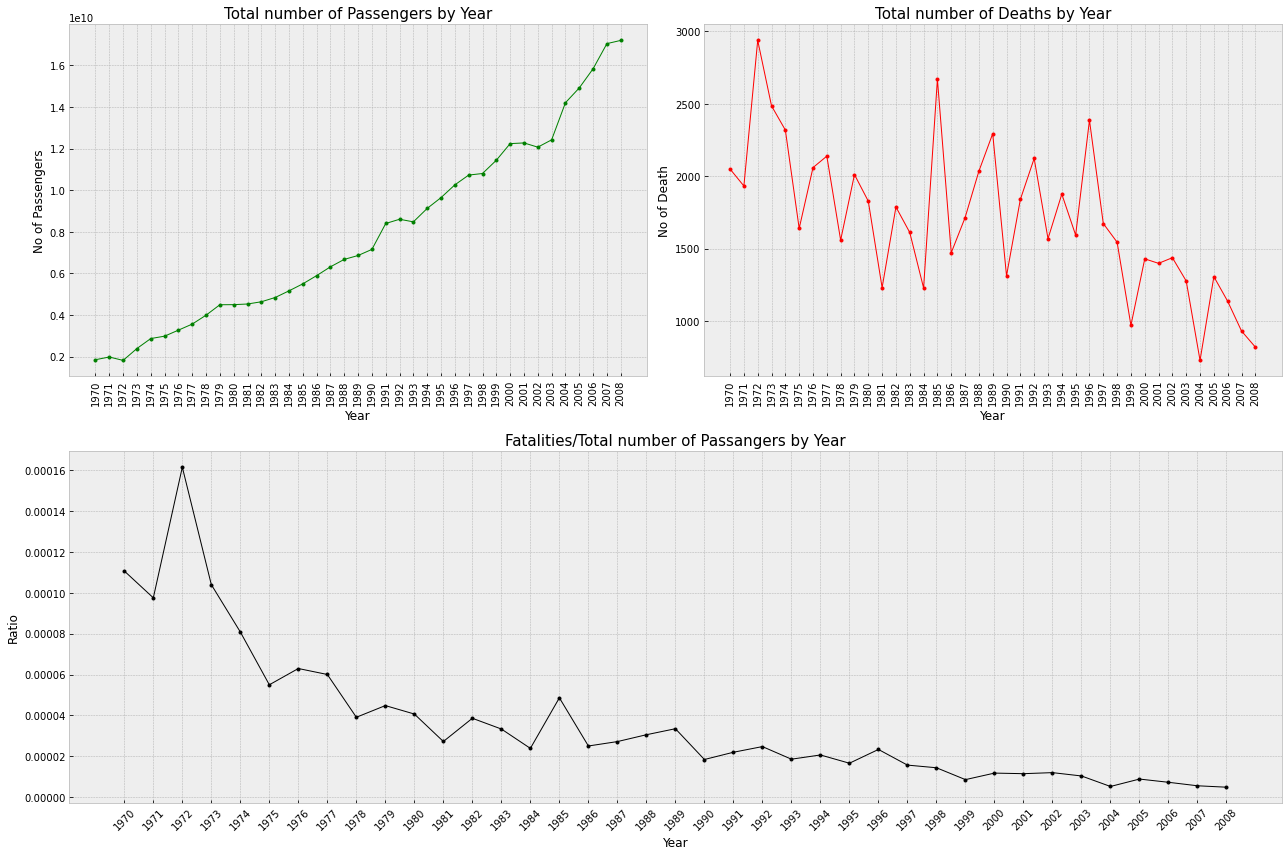

In [ ]:
gs = gridspec.GridSpec(2,2)
pl.figure(figsize=(18,12))

ax=pl.subplot(gs[0,0])
plt.plot(total.index, 'Sum', data=total, marker='.', color='green', linewidth=1)
plt.xlabel('Year')
plt.ylabel('No of Passengers')
plt.title('Total number of Passengers by Year', fontsize=15)
plt.xticks(rotation=90)

ax=pl.subplot(gs[0,1])
plt.plot(fatalities.index, 'Fatalities', data=total, marker='.', color='red', linewidth=1)
plt.xlabel('Year')
plt.ylabel('No of Death')
plt.title('Total number of Deaths by Year', fontsize=15)
plt.xticks(rotation=90)

ax=pl.subplot(gs[1,:])
plt.plot(fatalities.index, 'Ratio', data=total, marker='.', color='black', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Fatalities/Total number of Passangers by Year', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ratio and number of deaths in one plot

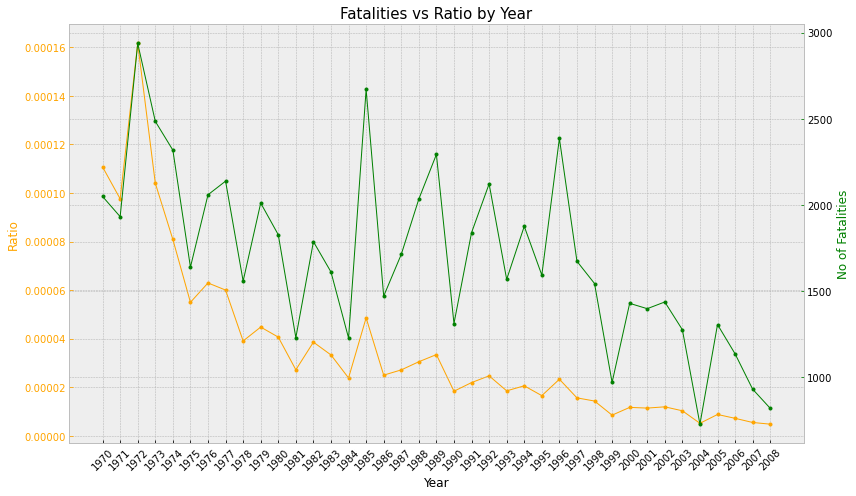

In [ ]:
fig = plt.figure(figsize=[12,7])
ax1 = fig.subplots()
ax1.plot(total.index,'Ratio', data=total, color='orange', marker='.',linewidth=1)
ax1.set_xlabel('Year',fontsize=12)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.set_ylabel('Ratio',color='orange', fontsize=12)
ax1.tick_params('y',colors='orange')

ax2 = ax1.twinx()
ax2.plot(fatalities.index,'Fatalities', data=fatalities, color='green', marker='.',linewidth=1)
ax2.set_ylabel('No of Fatalities', color='green', fontsize=12)
ax2.tick_params('y',color='green')
plt.title('Fatalities vs Ratio by Year', fontsize=15)
plt.tight_layout()
plt.show()

# Operator Analysis

In [ ]:
data.Operator = data.Operator.str.upper()
data.Operator = data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

total_by_op = data.groupby('Operator')[["Operator"]].count()
total_by_op = total_by_op.rename(columns={'Operator':'Count'})
total_by_op = total_by_op.sort_values(by='Count',ascending=False)


In [ ]:
total_by_op.head(15)

,Count
Operator,
AEROFLOT,179
MILITARY - U.S. AIR FORCE,176
AIR FRANCE,70
DEUTSCHE LUFTHANSA,65
AIR TAXI,48
UNITED AIR LINES,44
CHINA NATIONAL AVIATION CORPORATION,44
MILITARY - U.S. ARMY AIR FORCES,43
PAN AMERICAN WORLD AIRWAYS,41


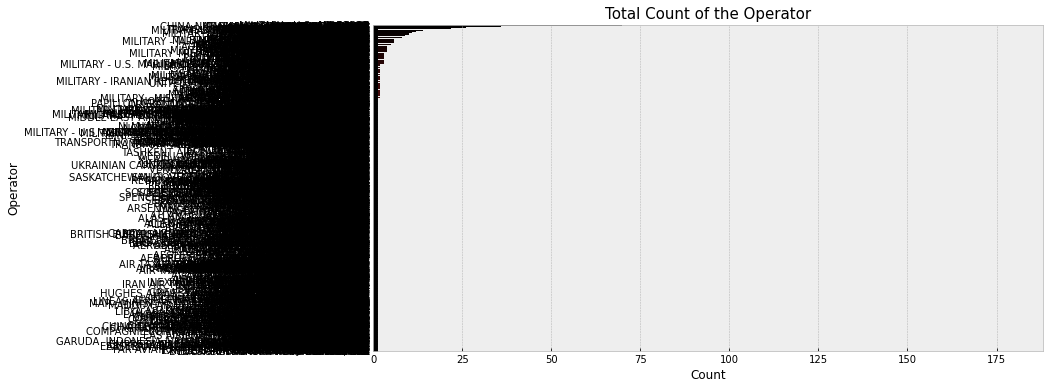

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=total_by_op.index, x='Count', data=total_by_op, palette='gist_heat',orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.title("Total Count of the Operator", fontsize=15)
plt.show()

In [ ]:
Prop_by_Op = data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={'Operator':'Fatalities'})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTop = Prop_by_Op.head(15)

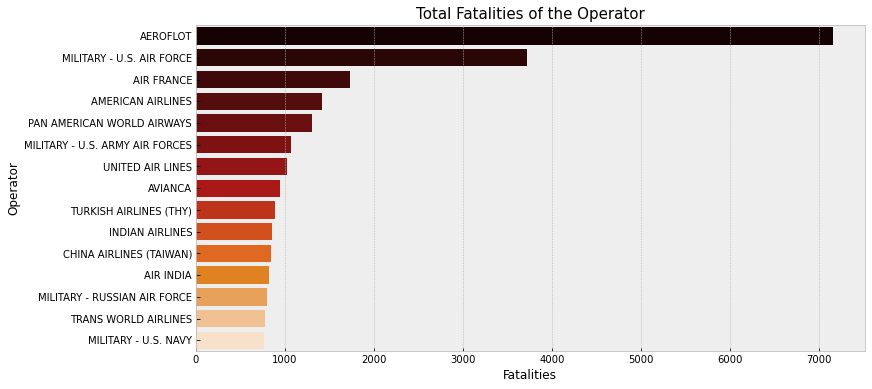

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTop.index, x='Fatalities', data=Prop_by_OpTop, palette='gist_heat', orient='h')
plt.xlabel('Fatalities', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.title("Total Fatalities of the Operator", fontsize=15)
plt.show()

In [ ]:
Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()

['MILITARY - EJÉRCITO DEL AIRE',
 'ARARAT AVIA',
 'HEWA BORA AIRWAYS',
 'MILITARY - UKRAINE AIR FORCE',
 'MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE',
 'CANADIAN AIR TRANSAT',
 'MILITARY U.S. NAVY',
 'ISLAND SKY FERRY - AIR TAXI',
 'US AIRWAYS',
 'SOUTHWEST AIRLINES',
 'CENTURIAN AIR CARGO',
 'AMERICAN INTERNATIONAL AIRWAYS',
 'REGIONAL COMPAGNIE AERIENNE EUROPEENNE',
 'WESTERN HELICOPTER']

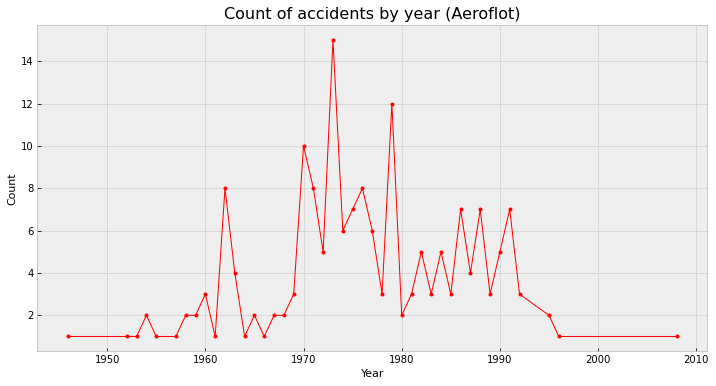

In [ ]:
Aeroflot = data[data.Operator == 'AEROFLOT']
Count_by_year = Aeroflot.groupby(data.Time.dt.year)[['Date']].count()
Count_by_year = Count_by_year.rename(columns={'Date':'Count'})

plt.figure(figsize=(12,6))
plt.plot(Count_by_year.index, 'Count', data=Count_by_year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by year (Aeroflot)', fontsize=16)
plt.show()